# **CVPS20 // Connected-Component Labeling**

*September 15, 2020*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from skimage.filters import threshold_otsu

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

---

### Counting Objects in Images: Connected-Component Labeling

<ipython-input-18-1dab404cab51>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(fname) / 255.


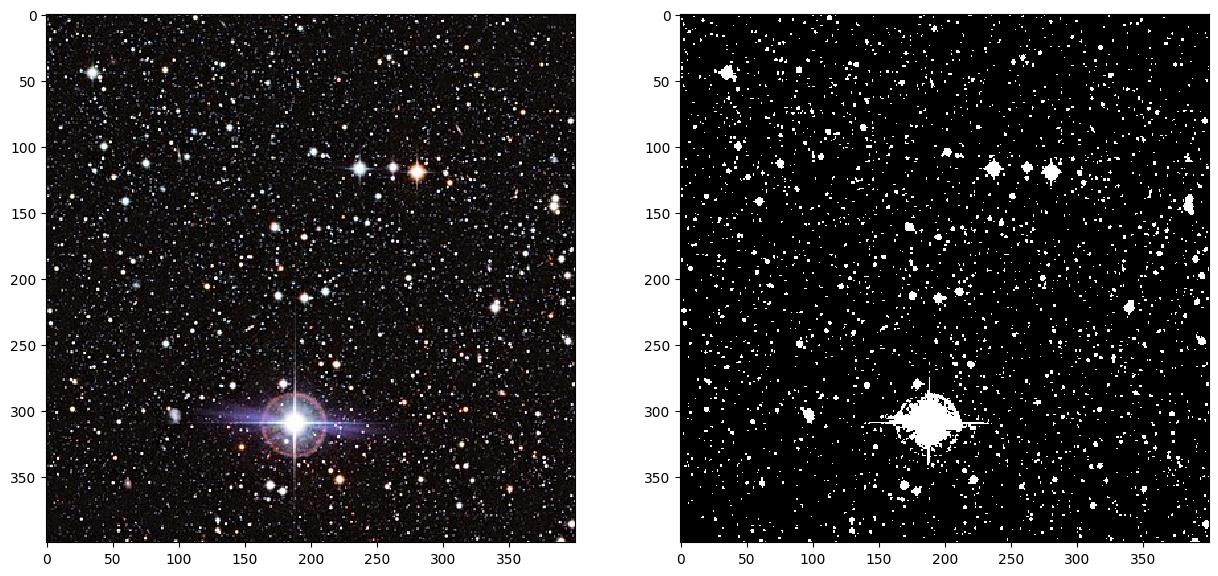

In [ ]:
# -- read in the Carina Dwarf Galaxy image
fname = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Carina_Dwarf_Galaxy.jpg/1920px-Carina_Dwarf_Galaxy.jpg"
img = iio.imread(fname) / 255.

# -- extract 3 color channels
red, grn, blu = img.transpose(2, 0, 1)

# -- find a threshold automatically using Otsu's method
othr = threshold_otsu(grn)

# -- show the image using Otsu's threshold
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(img[600:1000, 750:1150])
ax[1].imshow(grn[600:1000, 750:1150] > othr)

fig.show()

Now that we have thresholded this image, how many objects are there?  We can count them using "connected-component labeling",

In [ ]:
import scipy.ndimage.measurements as snm

In [ ]:
# -- label the thresholded green channel
grn_thr = grn > othr
labs, nlabs = snm.label(grn_thr)

<ipython-input-20-4a310b9983f8>:3: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(grn_thr)


In [ ]:
nlabs

18001

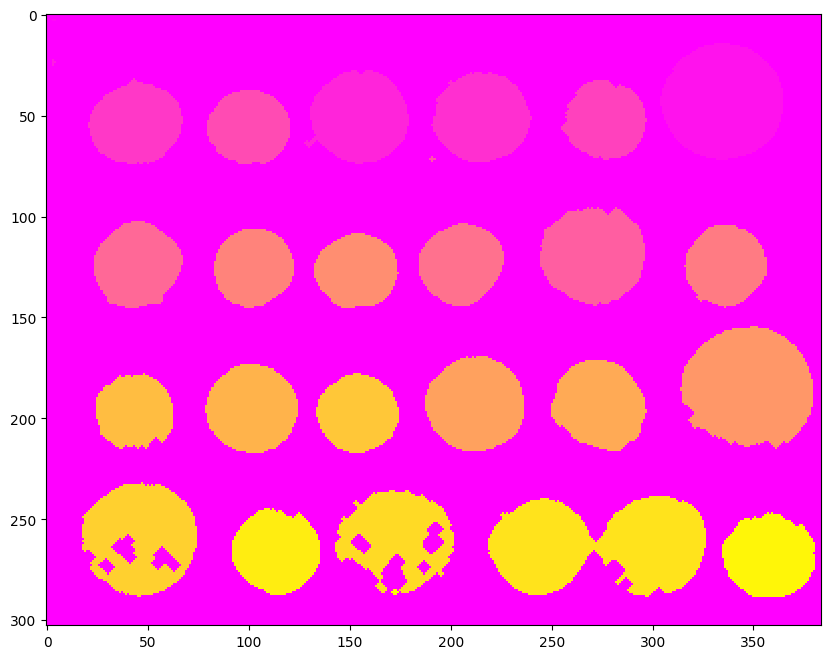

In [ ]:
plt.imshow(labs, cmap="spring",)

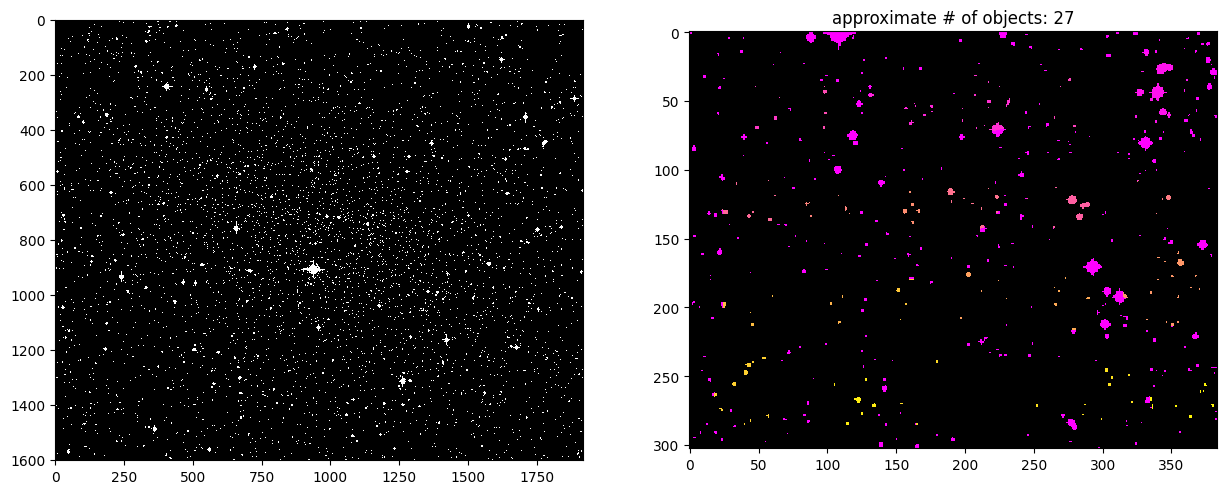

In [ ]:
# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(grn_thr)
ax[1].imshow(labs, cmap="spring",
             alpha=grn_thr.astype(float)
             )

ax[1].set_facecolor("black")
ax[1].set_title("approximate # of objects: {0}".format(nlabs))

fig.show()

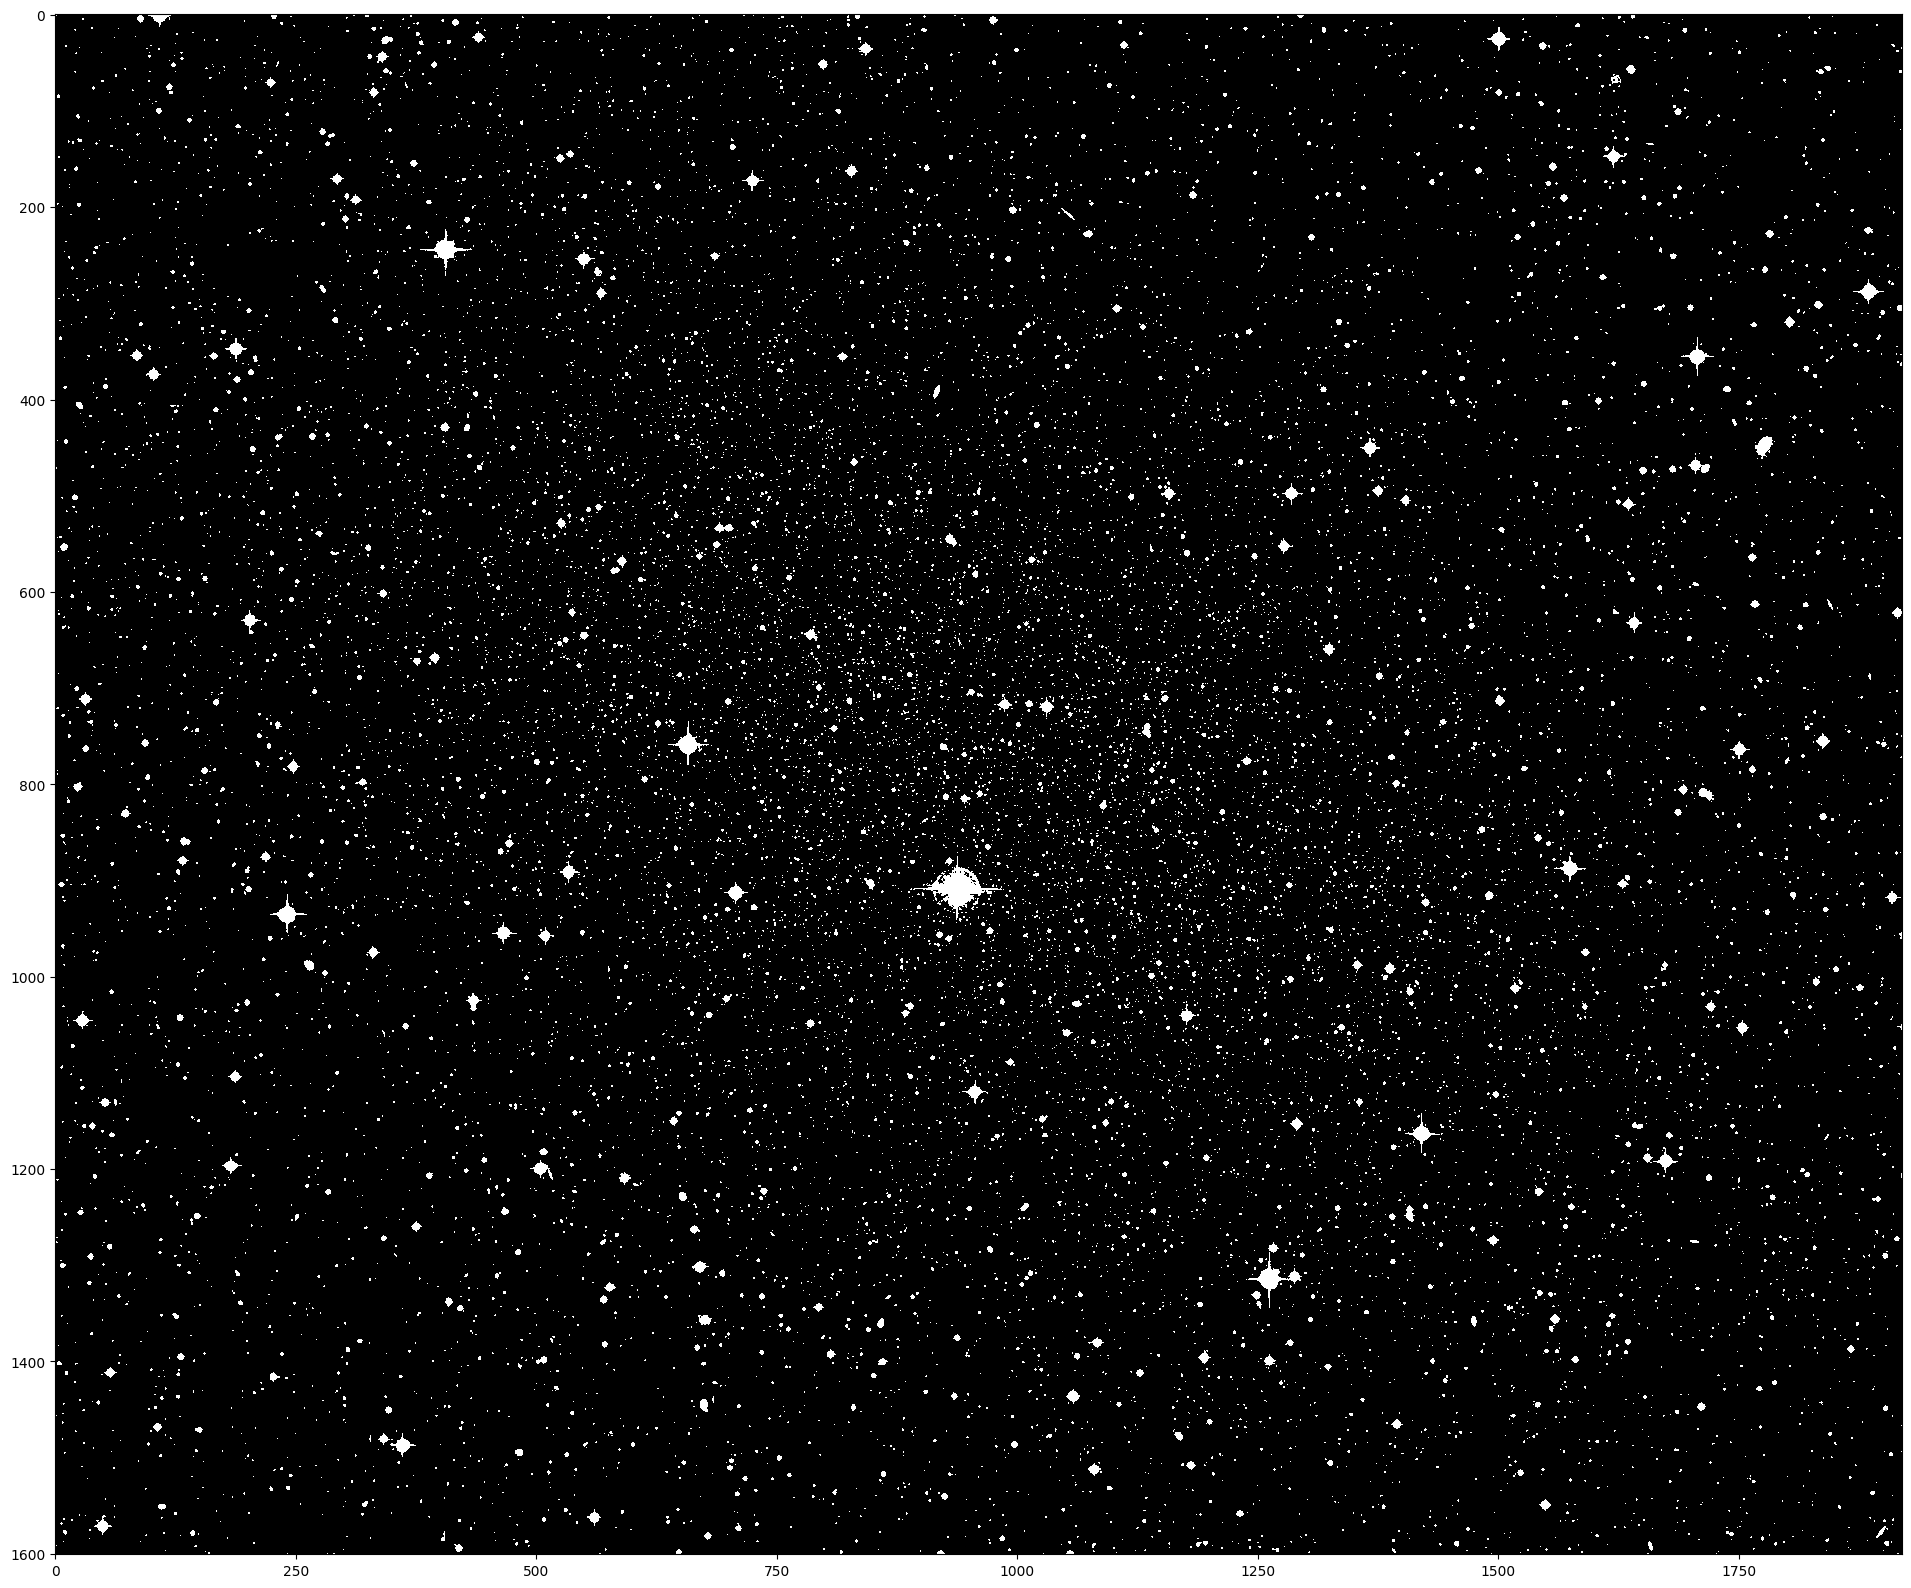

In [ ]:
plt.figure(figsize=(25,20))
plt.imshow(grn_thr)

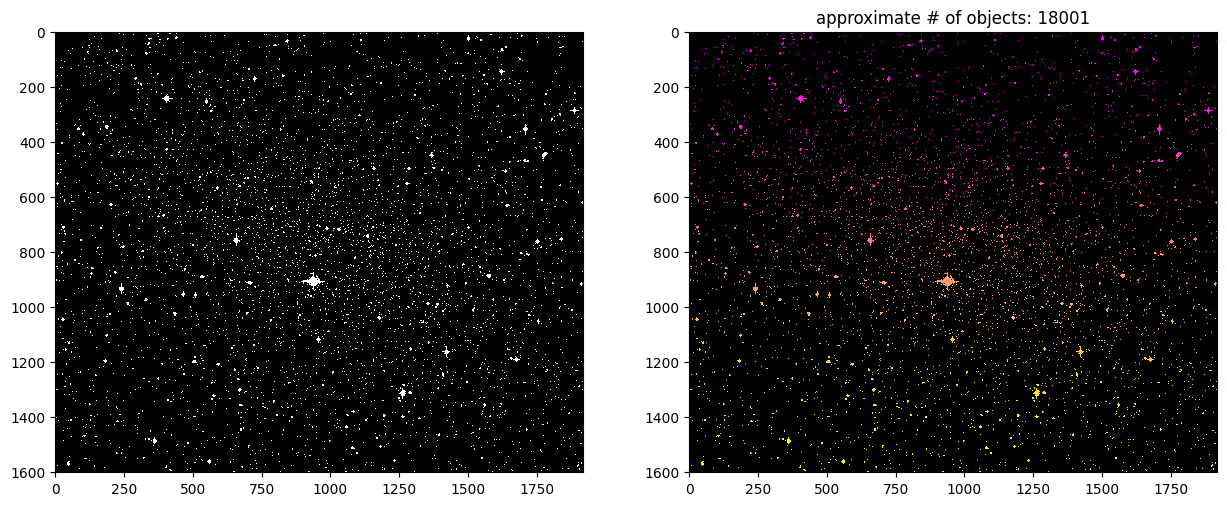

In [ ]:
# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(grn_thr)
ax[1].imshow(labs, cmap="spring", alpha=grn_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate # of objects: {0}".format(nlabs))

fig.show()

Let's look at an example with differently sized objects, from `scikit-image`'s example data library,

In [ ]:
from skimage.data import coins as coin_generator

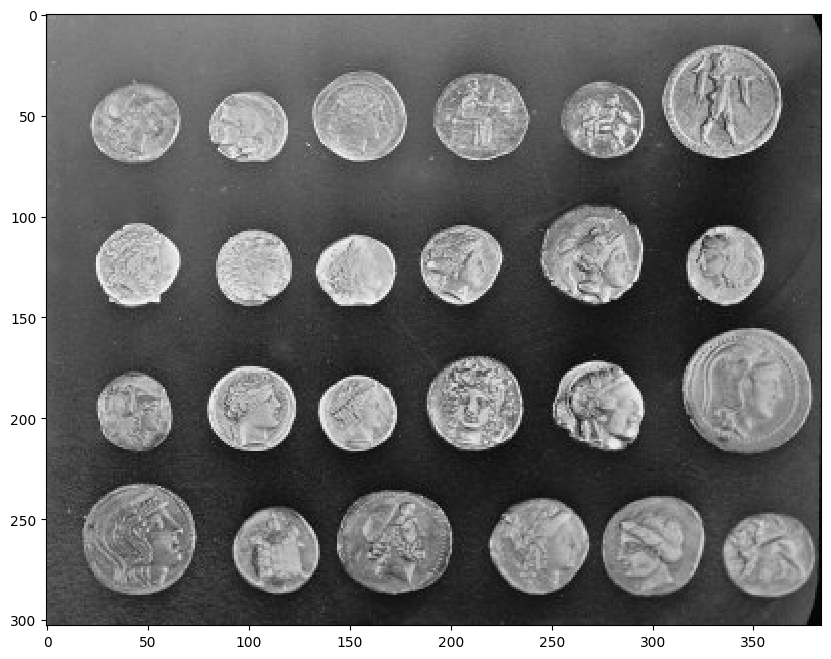

In [ ]:
# -- create coins image
coins = coin_generator() / 255.

plt.imshow(coins)


Let's try to count the number of coins, just as we did before

<ipython-input-26-0d81e3e0955f>:8: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(coins_thr)


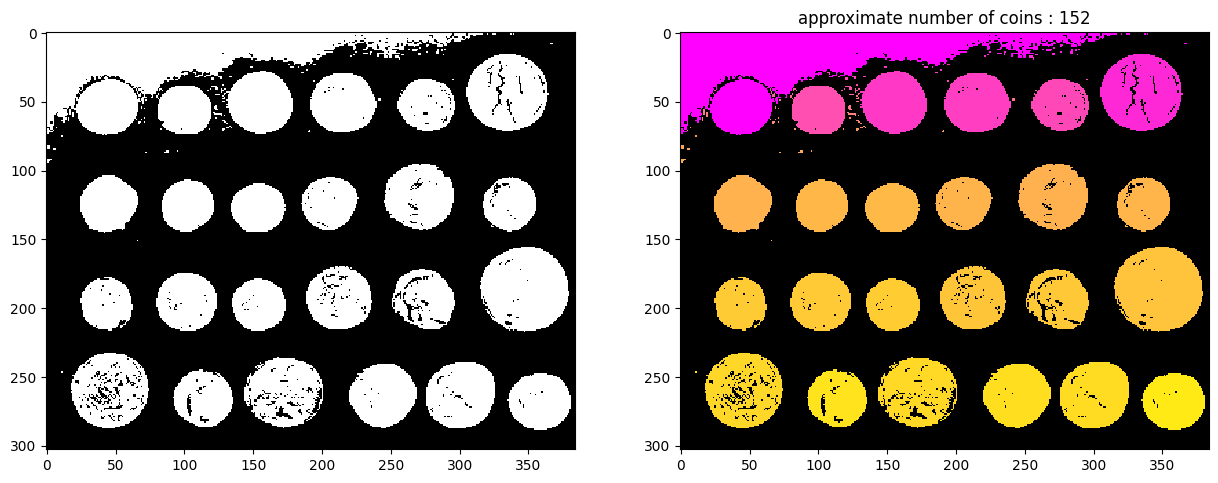

In [ ]:
# -- calculate the Otsu threshold for the coins
othr_coins = threshold_otsu(coins)

# -- threshold the coins image
coins_thr = coins > othr_coins

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")

ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()


If we set our threshold higher, we can remove the large artifact at the top of the image:

In [ ]:
othr_coins

0.4172564338235294

<ipython-input-28-e45b92bc12a3>:8: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(coins_thr)


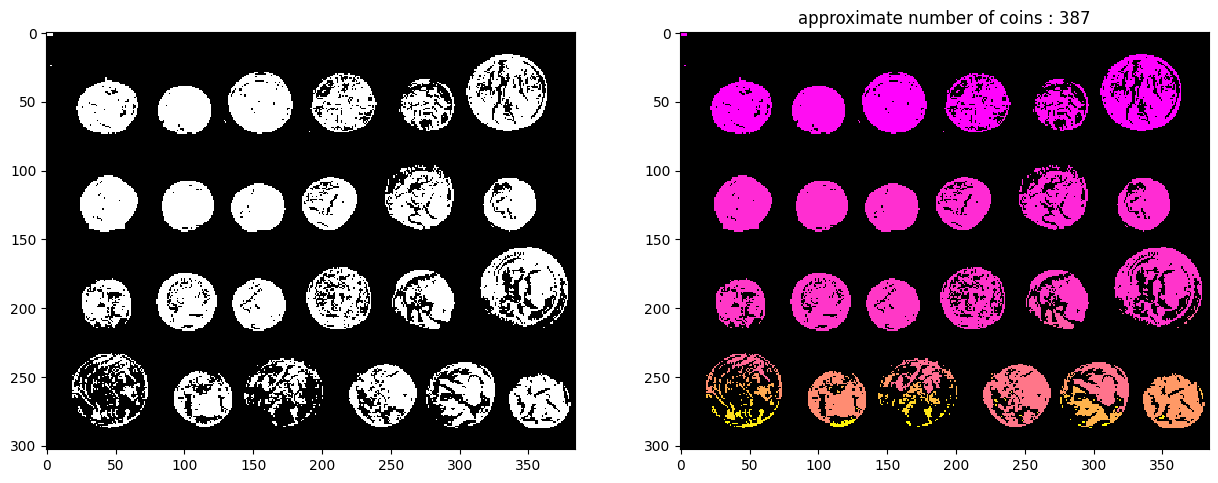

In [ ]:
# -- set a threshold
thr = 0.55

# -- threshold the coins image
coins_thr = coins > thr

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")

ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

But now the coins are significantly split apart...

---

### Binary Morphological Operations

Binary morphological operations, modify a binary image based on the distribution of T/F pixels.

Using `binary_erosion` will dissolve the coins a bit:

In [ ]:
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing

<ipython-input-13-d0c15f03d12f>:1: DeprecationWarning: Please import `binary_erosion` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing
<ipython-input-13-d0c15f03d12f>:1: DeprecationWarning: Please import `binary_dilation` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing
<ipython-input-13-d0c15f03d12f>:1: DeprecationWarning: Please import `binary_closing` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_closing


<ipython-input-14-01cd63350f8e>:11: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(coins_thr)


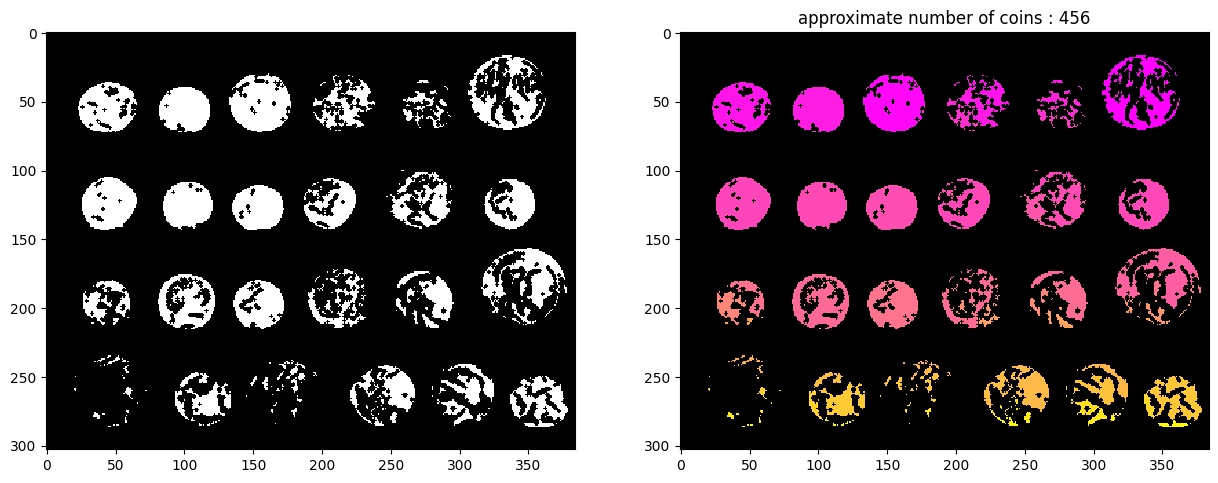

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- erode the binary image
coins_thr = binary_erosion(coins_thr)

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

However, subsequently dilating them will start to close them again:

<ipython-input-15-9197e02cd204>:12: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(coins_thr)


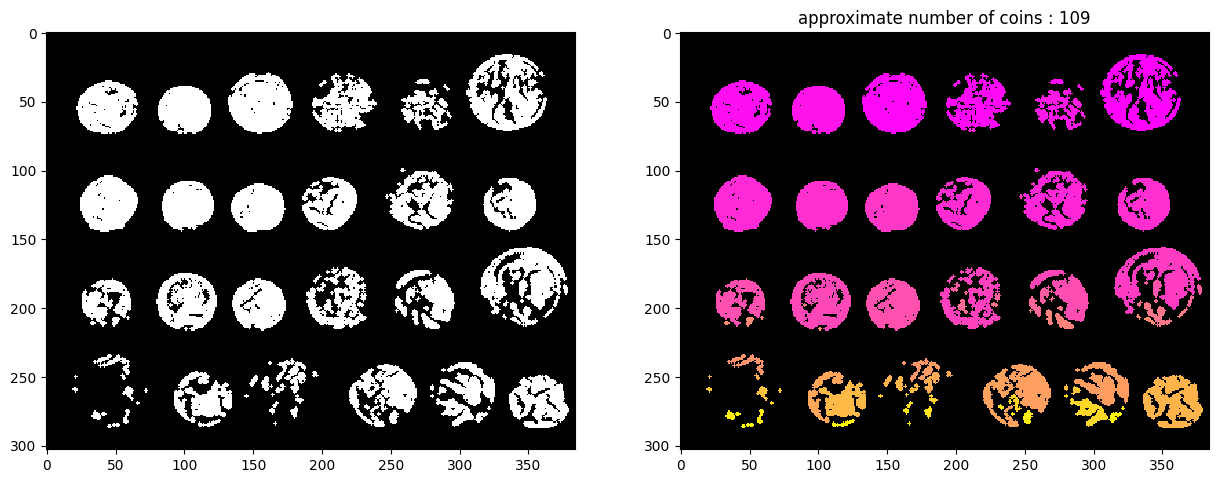

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- modify the binary image
coins_thr = binary_erosion(coins_thr)
coins_thr = binary_dilation(coins_thr)

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()

"Chaining" binary operations (in coordination with varying threshold values) can clean up the object segmentation and detection:

<ipython-input-31-ef5396715cd1>:15: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labs, nlabs = snm.label(coins_thr)


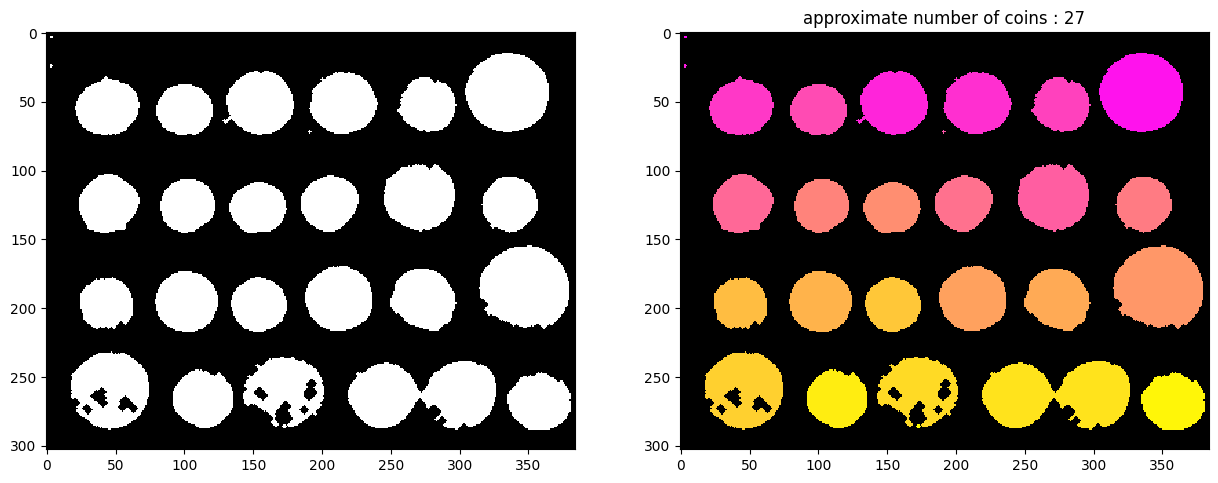

In [ ]:
# -- set threshold
thr_coins = 0.55

# -- threshold the coins image
coins_thr = coins > thr_coins

# -- modify the binary image
coins_thr = binary_dilation(coins_thr, iterations=2)
coins_thr = binary_erosion(coins_thr, iterations=2)
coins_thr = binary_dilation(coins_thr, iterations=2)
coins_thr = binary_closing(coins_thr, iterations=2)
coins_thr = binary_erosion(coins_thr)

# -- label the thresholded image
labs, nlabs = snm.label(coins_thr)

# -- display thresholded image and labels
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].imshow(coins_thr)
ax[1].imshow(labs, cmap="spring", alpha=coins_thr.astype(float))

ax[1].set_facecolor("black")
ax[1].set_title("approximate number of coins : {0}".format(nlabs))

fig.show()